#Bike Sharing Assignment

###Problem Statement

######A Bike Sharing Company, BoomBikes, found that due to the current Corona Pandemic, their revenue fell tremendously. Since the company couldn't operate in such a situation, it decided to utilise that time in creating a business plan to make up for the loss of revenue, as soon as the economy opens up and the country goes back to normal.



Their aim of their business plan is to what factors contribute to the demand for shared bikes among the population, so that they can be in a better position to facilite the demand for shared bikes as soon as the economy opens out and thus have an edge on their competitions gain large profits.

They want to understand two important Things:


1) What are the crucial variables which can help predict the demand for shared Bikes


2) How efficiently does these variables predict the demand for these bikes


###Business Objective

######A model has to be created with the given data from the company. The model should show how various independent variables affect the demand for shared bikes.The model must also be robust and good enough to explain the demand dynamics of a given market.

##Reading and Understanding the Data

In [1]:
# Supressing the warnings and Importing numpy and pandas
import warnings
warnings.filterwarnings('ignore')
import numpy as np, pandas as pd

In [2]:
#Reading the data 
bike = pd.read_csv("day.csv")

In [3]:
# Checking the data
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


####Gathering Information on the Bike Dataframe

In [4]:
#Finding the shape of the Data .
bike.shape

(730, 16)

In [5]:
#Finding the information regarding datatype and Count of non-nulls  of the columns 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Dropping the redundant columns
bike.drop(['dteday', 'casual','registered', 'instant'],axis=1,inplace=True)

In [7]:
#Converting the columns to the correct data types
bike['season']= bike['season'].astype('category')   
bike['weekday']= bike['weekday'].astype('category')   
bike['weathersit']= bike['weathersit'].astype('category')  
bike['mnth']= bike['mnth'].astype('category')     



In [8]:
#Checking if the conversion is successful
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [9]:
#Mappimg the categorical data to real names
bike.replace({'season' : {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter' }}, inplace= True)
bike.replace({'mnth' : {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec' }}, inplace= True)
bike.replace({'weekday' : {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}}, inplace= True)
bike.replace({'weathersit' : {1:'Fair_WX', 2:'Manageable_WX', 3:'Difficult_WX', 4:'Terrible_WX'}}, inplace= True)

In [10]:
#Checking the basic statistics of the various columns
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


##Visualization of Numeric Variables

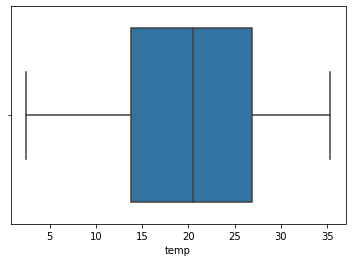

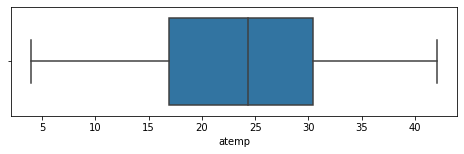

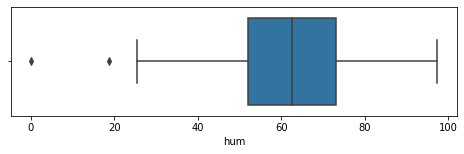

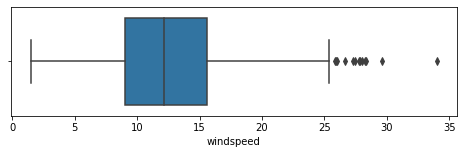

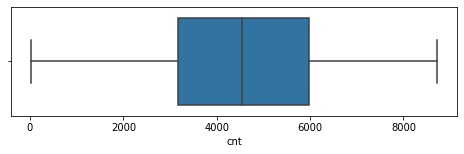

<Figure size 576x144 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
Num_list=['temp', 'atemp', 'hum', 'windspeed','cnt']
# Running a boxplot for the following to check for outliers
for i in Num_list:
  sns.boxplot(bike[i])
  plt.figure(figsize=(8,2))
plt.show()

<Figure size 1440x864 with 0 Axes>

<Figure size 432x288 with 0 Axes>

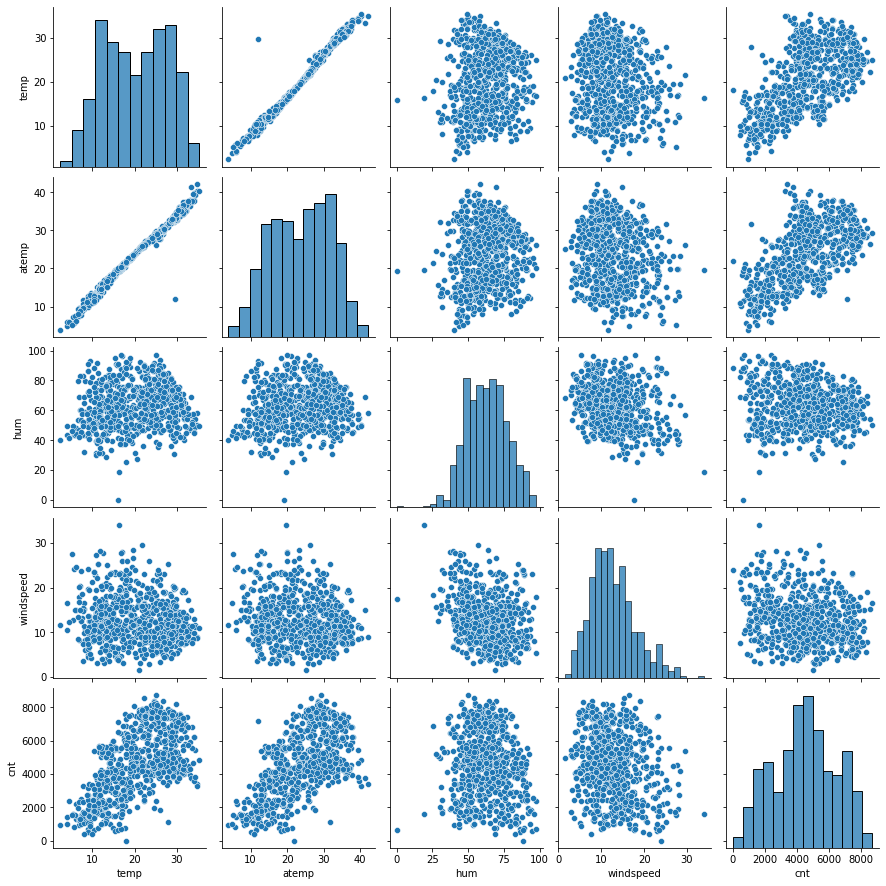

In [12]:
# Importing seaborn and matplotlib for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the Numeric Variables through pairplot
plt.figure(figsize=(20, 12))
plt.figure()
sns.pairplot(bike, vars=['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()



*   Temp (temperature in Celsius) and Atemp (feeling temperature in Celsius) are highly linearily correlation as both are closely related to each other.
*   Temp (temperature in Celsius) and Atemp (feeling temperature in Celsius) are displaying a somewhat positive correlation with cnt (count of total rental bikes including both casual and registered).






## Visualization of Categorical Variables

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

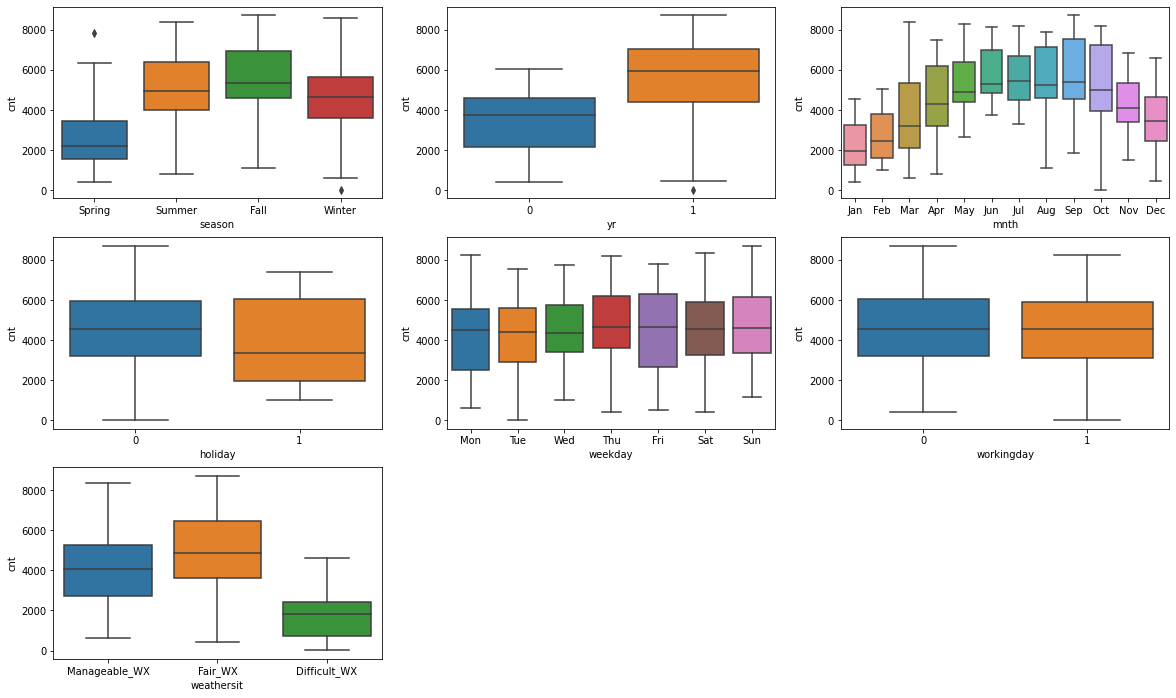

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()


*   More than 4000 people are likely to use shared bike during Fall, followed by Summer.
*  More than 4000 people were using shared bikes in 2019 as compared to 2018.
*  Months falling in Spring and Fall is when people hired more of these bikes
*  When it is not a holiday, the median of little over 4000 people were willing to use the bikes. But on holidays, less people rode them.
*  On the various days of the weeks,the median is consistently around or a little more than 4000
*  People are indifferent whether it is a working day or the weekend/holiday as they consistanty use shared bikes
* Nobody use shared bike when the weather is terrible. People prefer fair weather to cycle, followed by manageable weather


Note:
- Fair_weather: Clear, Few clouds, Partly cloudy, Partly cloudy
- Manageble_weather: + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist









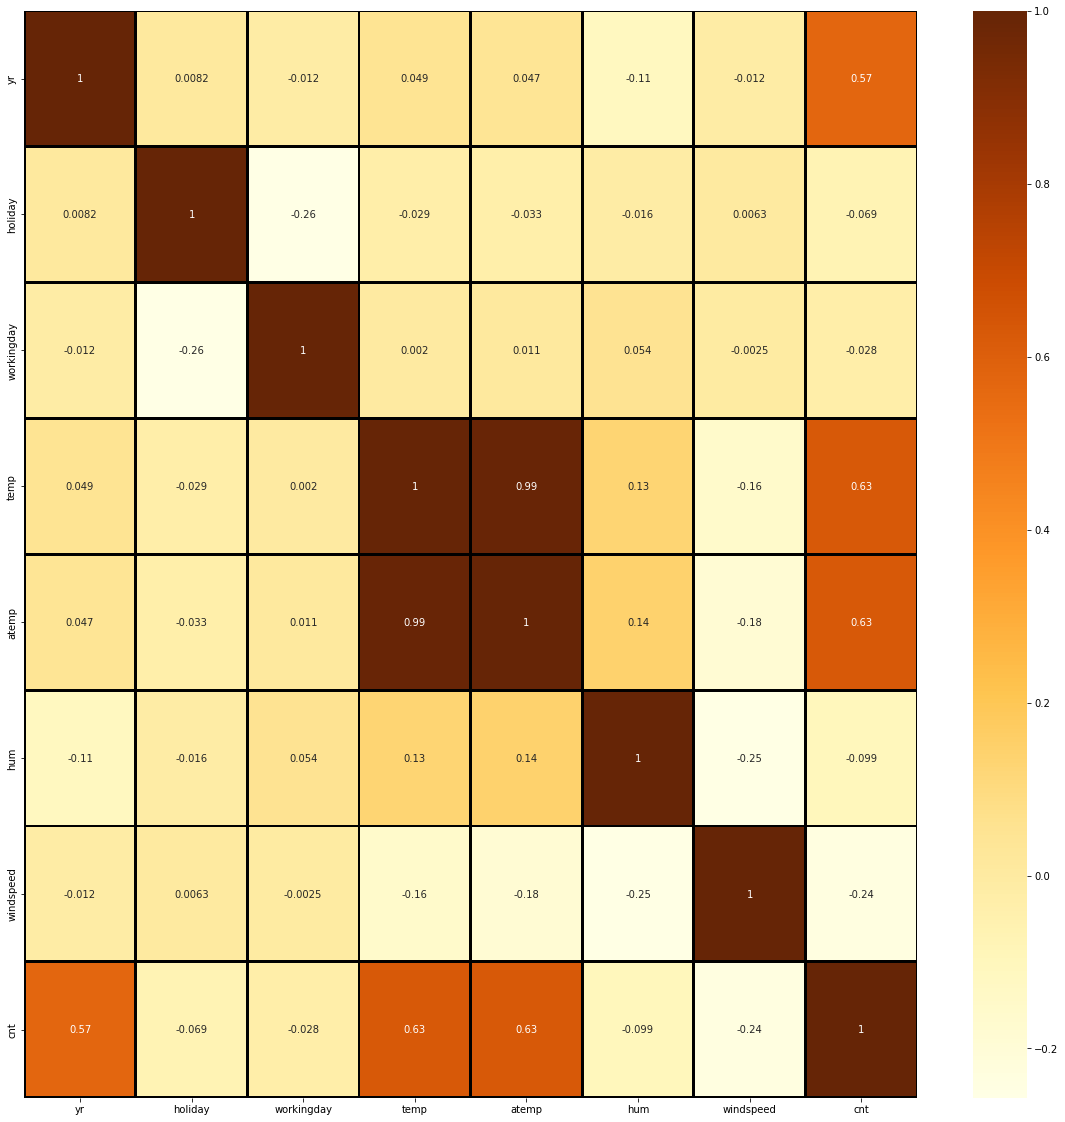

In [15]:
# Correlation among the variables

plt.figure(figsize = (20, 20))
sns.heatmap(bike.corr(), annot = True, cmap="YlOrBr", linewidths=2, linecolor='black')
plt.show()



*   Year is positively correlated with cnt(count of total rental bikes including both casual and registered) (0.57).
*   Holiday is slightly negatively correlated with workingday (-0.26)
*   Temp (temperature in Celsius) is very highly correlated with atemp (feeling temperature in Celsius) since both are a measurement the temperature.(0.99)
*   Temp (temperature in Celsius)is also slightly negatively correlated with windspeed (-0.16)
*   Temp (temperature in Celsius) is also correlated with cnt(count of total rental bikes including both casual and registered) (0.63)
*  Atemp(feeling temperature in Celsius) is also slightly correlated with windspeed(-0.18) and it is also correlated with cnt (count of total rental bikes including both casual and registered). (0.63)
* Hum (humidity) is slightly negatively correlated with windspeed. (-0.25)
* Windspeed is slightly negatively correalated with cnt (count of total rental bikes including both casual and registered). (-0.24)

Note:

All of the correlation are logical. In case of Temp and Atemp, one may be used in place of other as they are essentially the same variable.









##Converting certain variables into Dummy variables

In [16]:
# Variables such as 'mnth', 'weekday', 'season' & 'weathersit' are converted into Dummy variables.
# Then, the 1st dummy variable for each variable has been removed.
# And finallly the original columns has been removed as it is no longer required.

bike =pd.get_dummies(data=bike ,drop_first=True)

#Checking the conversion
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair_WX,weathersit_Manageable_WX
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Now Checking the data shape
bike.shape

(730, 30)

In [18]:
# Checking the datatype of various columns in bike dataframe after converting some variables into dummies
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        730 non-null    int64  
 1   holiday                   730 non-null    int64  
 2   workingday                730 non-null    int64  
 3   temp                      730 non-null    float64
 4   atemp                     730 non-null    float64
 5   hum                       730 non-null    float64
 6   windspeed                 730 non-null    float64
 7   cnt                       730 non-null    int64  
 8   season_Spring             730 non-null    uint8  
 9   season_Summer             730 non-null    uint8  
 10  season_Winter             730 non-null    uint8  
 11  mnth_Aug                  730 non-null    uint8  
 12  mnth_Dec                  730 non-null    uint8  
 13  mnth_Feb                  730 non-null    uint8  
 14  mnth_Jan  

#Splitting Bike Data into Training and Testing Sets

In [19]:
#Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# The random_state has been included to ensure that the train and test data set will have exactly same rows.
# Using the 80:20 ratio where 80% of the data is used for train set and 20% of the data will be used for test set, as the data is rather small.
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.8, test_size = 0.2, random_state = 100)

In [20]:
## Checking for missing values in the train_set
bike_train.isnull().sum()

yr                          0
holiday                     0
workingday                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
cnt                         0
season_Spring               0
season_Summer               0
season_Winter               0
mnth_Aug                    0
mnth_Dec                    0
mnth_Feb                    0
mnth_Jan                    0
mnth_Jul                    0
mnth_Jun                    0
mnth_Mar                    0
mnth_May                    0
mnth_Nov                    0
mnth_Oct                    0
mnth_Sep                    0
weekday_Mon                 0
weekday_Sat                 0
weekday_Sun                 0
weekday_Thu                 0
weekday_Tue                 0
weekday_Wed                 0
weathersit_Fair_WX          0
weathersit_Manageable_WX    0
dtype: int64

In [21]:
#Checking for missing values in the test set
bike_test.isnull().sum()

yr                          0
holiday                     0
workingday                  0
temp                        0
atemp                       0
hum                         0
windspeed                   0
cnt                         0
season_Spring               0
season_Summer               0
season_Winter               0
mnth_Aug                    0
mnth_Dec                    0
mnth_Feb                    0
mnth_Jan                    0
mnth_Jul                    0
mnth_Jun                    0
mnth_Mar                    0
mnth_May                    0
mnth_Nov                    0
mnth_Oct                    0
mnth_Sep                    0
weekday_Mon                 0
weekday_Sat                 0
weekday_Sun                 0
weekday_Thu                 0
weekday_Tue                 0
weekday_Wed                 0
weathersit_Fair_WX          0
weathersit_Manageable_WX    0
dtype: int64

In [22]:
#Checking the shape of the train data
bike_train.shape

(584, 30)

In [23]:
#Checking the shape of the test data
bike_test.shape

(146, 30)

#Rescaling variables using Min-Max Method

In [24]:
#Importing MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [25]:
scaler = MinMaxScaler()

In [26]:
# Scaler() has been applied on numerical columns which are not binary in nature. 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [27]:
#Checking on whether the Scaler has been applied on the train data
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair_WX,weathersit_Manageable_WX
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,...,0,0,0,0,0,1,0,0,1,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,1,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,...,0,0,0,0,0,0,0,1,1,0
705,1,0,0,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,...,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
#Checking the effect of scaler on the statistics of train date. Values will generally lie between 0 and 1 except for count.
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair_WX,weathersit_Manageable_WX
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,...,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.630137,0.342466
std,0.500241,0.163378,0.446377,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,...,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.483181,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Checking Correlation in the train dataset

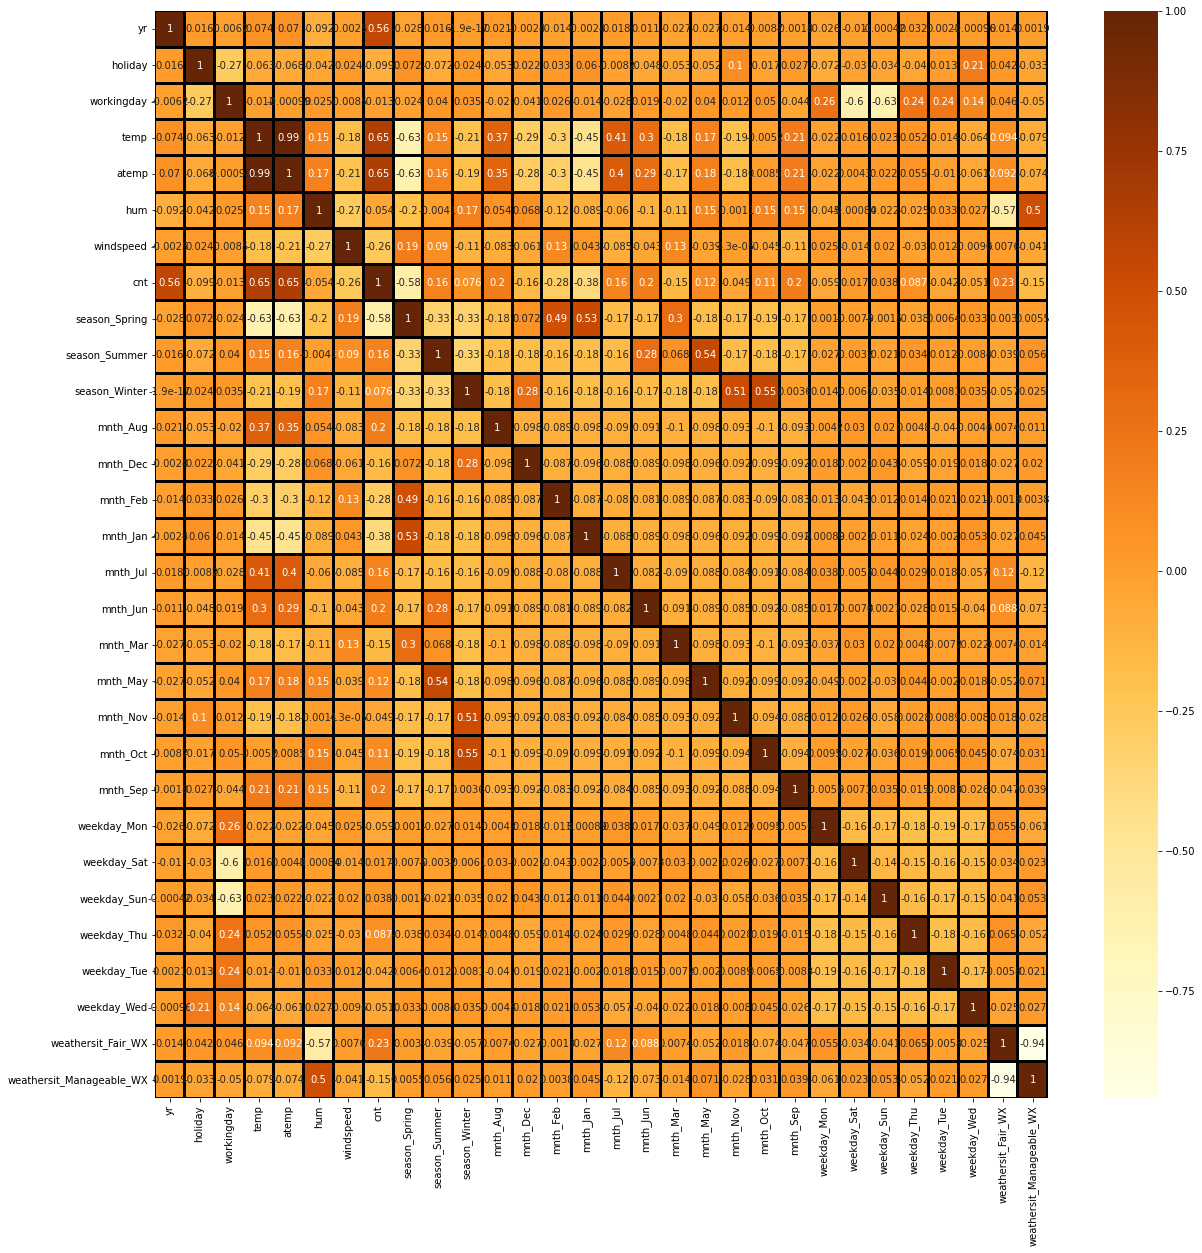

In [29]:
plt.figure(figsize = (20, 20))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlOrBr", linewidths=2, linecolor='black')
plt.show()

######**Overview of the correlation among variables in the Train Data Set**

#Formulate X and Y sets for the Model Building Process

In [30]:
# Making y_train as cnt (dependant variable/the predicted)
y_train = bike_train.pop('cnt')
# Making all the other variables as X_trian (independent variable/predictors)
X_train = bike_train

##Feature Selection 1: Using RFE (Automated Approach)

In [31]:
# Importing RFE from sklearn.feature_selection and LinearRegressionfrom sklearn.linear_model 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Running RFE to select 15 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)     # running RFE     
rfe = rfe.fit(X_train, y_train)

In [33]:
# Getting the variables that are selected and variables that are rejected according to Rfe along with their Ranks.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('weathersit_Fair_WX', True, 1),
 ('weathersit_Manageable_WX', True, 1)]

In [34]:
#The 15 variables Rfe has selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Fair_WX',
       'weathersit_Manageable_WX'],
      dtype='object')

In [35]:
#The variables the rfe has rejected
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

##Feature Selection 2: Using Manual Selection (Manual Tuning Approach)
Model Building Using Manual Selection

```

```



#####**Model One**

In [36]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [37]:
# Using Statsmodel to build model
import statsmodels.api as sm 

# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)

In [38]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   

In [39]:
# Summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          9.71e-222
Time:                        18:32:27   Log-Likelihood:                 594.34
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     568   BIC:                            -1087.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**All the variables are significant.**







In [40]:
# Calculating the VIFs for the model One by import Variance_inflation_factor from statsmodels.stats.outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [41]:
# Dropping the const
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [42]:
# Buiding a dataframe that will display the feature variables along with their VIFs for Model One
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.62
2,temp,25.46
13,weathersit_Fair_WX,16.34
14,weathersit_Manageable_WX,9.69
5,season_Spring,5.89
4,windspeed,4.63
7,season_Winter,4.31
6,season_Summer,3.26
0,yr,2.11
11,mnth_Nov,1.80


#####**The three variables having high VIF are Weathersit_Fair_WX	(10.97), weathersit_Manageable_WX (9.49) and season_Spring (5.39)**

#####**Model Two**

In [43]:
#In this model, we will drop Weathersit_Fair_WX	(10.97)
X_train_oneless = X_train_rfe.drop(["weathersit_Fair_WX"], axis = 1)

In [44]:
# Adding a constant variable   
X_train_lm2 = sm.add_constant(X_train_oneless)

In [45]:
# Running the Linear Model
lm_2 = sm.OLS(y_train,X_train_lm2).fit() 

In [46]:
#Summary of the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     188.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          4.40e-203
Time:                        18:32:27   Log-Likelihood:                 547.25
No. Observations:                 584   AIC:                            -1064.
Df Residuals:                     569   BIC:                            -998.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

######**Mnth_Jan is insignificant.**

In [47]:
#Checking the columns of Model 2
X_train_oneless.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Manageable_WX'],
      dtype='object')

In [48]:
# Dropping the const
#X_train_onless = X_train_oneless.drop(['const'], axis=1)

In [49]:
# Building a dataframe that will display the features variables along with their VIFs for model Two

vif = pd.DataFrame()
X = X_train_oneless
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.62
2,temp,16.14
4,windspeed,4.58
5,season_Spring,4.23
7,season_Winter,3.75
6,season_Summer,2.73
0,yr,2.11
13,weathersit_Manageable_WX,2.11
11,mnth_Nov,1.72
9,mnth_Jan,1.68


#####**season_Spring(5.36) has a high VIF.**

#####**Model Three**

In [50]:
#In this model, month Jan will be dropped since its p-value is insignificant(0.120)
X_train_twoless = X_train_oneless.drop(["mnth_Jan"], axis = 1)

In [51]:
# Adding a constant variable 
X_train_lm3 = sm.add_constant(X_train_twoless)

In [52]:
#Running the linear Regression
lm_3 = sm.OLS(y_train,X_train_lm3).fit() 

#The summary of the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     202.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.01e-203
Time:                        18:32:27   Log-Likelihood:                 546.01
No. Observations:                 584   AIC:                            -1064.
Df Residuals:                     570   BIC:                            -1003.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**Mnth_Dec is insignificant (0.11)**

In [53]:
#Checking the columns of Model 3
X_train_twoless.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Manageable_WX'],
      dtype='object')

In [54]:
#Dropping the const
#X_train_twoless = X_train_twoless.drop(['const'], axis=1)

In [55]:
# Building the dataframe that will display the feature variables along with their VIF for Model 3
vif = pd.DataFrame()
X = X_train_twoless
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.55
2,temp,15.29
4,windspeed,4.58
5,season_Spring,3.90
7,season_Winter,3.75
6,season_Summer,2.73
12,weathersit_Manageable_WX,2.11
0,yr,2.09
10,mnth_Nov,1.71
9,mnth_Jul,1.60


#####**Hum (25.55) and Temp (15.29) have very high VIF.**

#####**Model Four**

In [56]:
#In this model, Mnth_Dec will be dropped (0.11)
X_train_threeless = X_train_twoless.drop(["mnth_Dec"], axis = 1)

In [57]:
# Adding a constant variable 
X_train_lm4 = sm.add_constant(X_train_threeless)

In [58]:
#Running the linear regression
lm_4 = sm.OLS(y_train,X_train_lm4).fit() 

#The summary of the linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     218.5
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.38e-204
Time:                        18:32:27   Log-Likelihood:                 544.70
No. Observations:                 584   AIC:                            -1063.
Df Residuals:                     571   BIC:                            -1007.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**Mnth_Nov is insignificant (0.087).**





In [59]:
#Checking VIF for Model Four

In [60]:
#Checking the columns of Model Four
X_train_threeless.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Manageable_WX'],
      dtype='object')

In [61]:
#X_train_threeless = X_train_threeless.drop(['const'], axis=1)

In [62]:
#Building a dataframe that will display the feature variables along with their VIFS
vif = pd.DataFrame()
X = X_train_threeless
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.44
2,temp,14.66
4,windspeed,4.58
5,season_Spring,3.90
7,season_Winter,3.53
6,season_Summer,2.72
0,yr,2.09
11,weathersit_Manageable_WX,2.09
8,mnth_Jul,1.60
9,mnth_Nov,1.53


#####**Hum (24.44) and Temp (	14.66) still have very high VIF.**

####**Model Five**

In [63]:
#In this model,mnth_Nov will be dropped	(0.087)
X_train_fourless = X_train_threeless.drop(["mnth_Nov"], axis = 1)

In [64]:
# Adding a constant variable 
X_train_lm5 = sm.add_constant(X_train_fourless)

In [65]:
# Running a linear Regression
lm_5 = sm.OLS(y_train,X_train_lm5).fit() 

#Summary of the linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     237.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          6.48e-205
Time:                        18:32:27   Log-Likelihood:                 543.20
No. Observations:                 584   AIC:                            -1062.
Df Residuals:                     572   BIC:                            -1010.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**All the coefficients are Significant.**

In [66]:
#Checking VIF for Model 5

In [67]:
#Checking the columns of Model 5
X_train_fourless.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sep',
       'weathersit_Manageable_WX'],
      dtype='object')

In [68]:
#X_train_fourless = X_train_fourless.drop(['const'], axis=1)

In [69]:
# Building a dataframe to display the feature variables along with their VIFs
vif = pd.DataFrame()
X = X_train_fourless
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.35
2,temp,14.55
4,windspeed,4.53
5,season_Spring,3.87
7,season_Winter,3.17
6,season_Summer,2.71
0,yr,2.09
10,weathersit_Manageable_WX,2.09
8,mnth_Jul,1.60
9,mnth_Sep,1.38


#####**Hum (24.35) and Temp	14.55 have high VIFs.**

####**MODEL SIX**

In [70]:
#In this model, we will drop Hum
X_train_fiveless = X_train_fourless.drop(["hum"], axis = 1)

In [71]:
# Adding a constant variable  
X_train_lm6 = sm.add_constant(X_train_fiveless)

In [72]:
#Running the linear regression
lm_6 = sm.OLS(y_train,X_train_lm6).fit() 

#The summary of the linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          8.00e-191
Time:                        18:32:27   Log-Likelihood:                 507.15
No. Observations:                 584   AIC:                            -992.3
Df Residuals:                     573   BIC:                            -944.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

######**All the coefficients are significant.**

In [73]:
#Checking VIF for Model Six

In [74]:
#Checking the columns of Model Six
X_train_fiveless.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Manageable_WX'],
      dtype='object')

In [75]:
#X_train_fiveless = X_train_fiveless.drop(['const'], axis=1)

In [76]:
# Building a dataframe of the feature variables along with their VIFs
vif = pd.DataFrame()
X = X_train_fiveless
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.23
3,windspeed,4.52
5,season_Summer,2.27
4,season_Spring,2.14
0,yr,2.07
6,season_Winter,1.77
7,mnth_Jul,1.60
9,weathersit_Manageable_WX,1.53
8,mnth_Sep,1.33
1,holiday,1.04


#####**Temp has a VIF of 5.23 which barely just Acceptable.**

#####***Model 6 is a good Model with all the coefficients significant and the VIFs of all the feature Variables 5 or less. The R2 is 0.797 and the Adjusted R2 is 0.793. However, we will explore more to see if we  can create a better model than this one.***

####**Model Seven**

#####**Just as an experiment, we will drop temp here.**

In [77]:
#In this model, Temp will be dropped
X_train_sixless = X_train_fiveless.drop(["temp"], axis = 1)

In [78]:
# Adding a constant variable   
X_train_lm7 = sm.add_constant(X_train_sixless)

In [79]:
#Running a linear regression
lm_7 = sm.OLS(y_train,X_train_lm7).fit() 

#The Summary of the linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          9.45e-150
Time:                        18:32:28   Log-Likelihood:                 407.71
No. Observations:                 584   AIC:                            -795.4
Df Residuals:                     574   BIC:                            -751.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**Mnth_Jul now becomes insignificant and the r2 and adjusted r2 falls drastically to 0.714 and 0.710 respectively. The fall in the R2 and adjusted R2 tells us that temp plays an important role in predicting the y variable (cnt).**

In [80]:
#Checking VIP for model seven

In [81]:
#Checking the columns of model seven
X_train_sixless.columns

Index(['yr', 'holiday', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Manageable_WX'],
      dtype='object')

In [82]:
#X_train_sixless = X_train_sixless.drop(['const'], axis=1)

In [83]:
#Building a DataFrame of the feature variables of Model Seven along with their VIFs
vif = pd.DataFrame()
X = X_train_sixless
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.69
3,season_Spring,2.13
4,season_Summer,2.01
0,yr,1.88
5,season_Winter,1.71
8,weathersit_Manageable_WX,1.49
6,mnth_Jul,1.20
7,mnth_Sep,1.15
1,holiday,1.04


####**All the variables have VIFs below 4 which is good.**

####**Model eight**

#### Now we will take Model 4 and remove "weathersit_Manageable_WX"

In [84]:
#In this model, we will drop weathersit_Manageable_WX	
X_train_eight= X_train_threeless.drop(["weathersit_Manageable_WX"], axis = 1)

In [85]:
# Adding a constant variable  
X_train_lm8 = sm.add_constant(X_train_eight)

In [86]:
#Running a linear regression
lm_8 = sm.OLS(y_train,X_train_lm8).fit() 

#Summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     236.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.50e-204
Time:                        18:32:28   Log-Likelihood:                 542.34
No. Observations:                 584   AIC:                            -1061.
Df Residuals:                     572   BIC:                            -1008.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3599      0.035     10.420

#####**All the coefficients are significant**

In [87]:
#Checking VIF for model eight

In [88]:
#Checking the columns of model eight
X_train_eight.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')

In [89]:
#Building a DataFrame of the feature variables of Model Eight along with their VIFs
vif = pd.DataFrame()
X = X_train_eight
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.85
2,temp,13.00
4,windspeed,4.58
5,season_Spring,3.70
7,season_Winter,3.39
6,season_Summer,2.69
0,yr,2.08
8,mnth_Jul,1.60
9,mnth_Nov,1.53
10,mnth_Sep,1.39


#### **Both hum (17.85) and temp (13.00) have a high VIF**

####**Model Nine**

Removing weathersit_Manageable_WX from Model Five to see if it improves the model

In [90]:

X_train_nine = X_train_fourless.drop(["weathersit_Manageable_WX"], axis = 1)

In [91]:
# Adding a constant variable 
X_train_lm9 = sm.add_constant(X_train_nine)

In [92]:
#Running the Linear regression
lm_9 = sm.OLS(y_train,X_train_lm9).fit()
 
#The summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     259.0
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          3.62e-205
Time:                        18:32:28   Log-Likelihood:                 540.93
No. Observations:                 584   AIC:                            -1060.
Df Residuals:                     573   BIC:                            -1012.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3502      0.034     10.270

####**All the coefficients are significant.**

In [93]:
#Finding the names of columns of model 9
X_train_nine.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [94]:
#Building a DataFrame of the feature variables of Model Nine along with their VIFs
vif = pd.DataFrame()
X = X_train_nine
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.81
2,temp,12.93
4,windspeed,4.53
5,season_Spring,3.68
7,season_Winter,3.00
6,season_Summer,2.69
0,yr,2.08
8,mnth_Jul,1.60
9,mnth_Sep,1.38
1,holiday,1.04


##### Hum and Temp are still showing High VIF. Hum and Temp have some multicolinearity. However, dropping either one of them, reduces the r2 and adjusted r2 of the model. The aim of model 8 and 9 was to remove other variables that are somewhat included in season_Spring and season_Summer in hope of reducing the VIFs to an acceptable level.

#### **Model 10**

####We will aim to remove the months instead as they are somewhat included in the seasons variables. In model 10, we will use Model 5 and remove mnth Jul.

In [95]:

X_train_ten = X_train_fourless.drop(["mnth_Jul"], axis = 1)

In [96]:
# Adding a constant variable  
X_train_lm10 = sm.add_constant(X_train_ten)

In [97]:
#Running the linear Regression
lm_10 = sm.OLS(y_train,X_train_lm10).fit() 
#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     255.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.19e-203
Time:                        18:32:28   Log-Likelihood:                 537.35
No. Observations:                 584   AIC:                            -1053.
Df Residuals:                     573   BIC:                            -1005.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

####**As a result, season_Spring (0.101) is insignificant.**

In [98]:
#Building a DataFrame of the feature variables of Model Ten along with their VIFs
vif = pd.DataFrame()
X = X_train_ten
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.35
2,temp,13.30
4,windspeed,4.53
5,season_Spring,3.77
7,season_Winter,2.99
6,season_Summer,2.35
0,yr,2.09
9,weathersit_Manageable_WX,2.08
8,mnth_Sep,1.27
1,holiday,1.04


####**Still Hum (24.35) and Temp (13.30) are having very high VIF.**

#####**Model Eleven**

In [99]:
#Dropping mnth_sep from model ten 
X_train_eleven = X_train_ten.drop(["mnth_Sep"], axis = 1)

In [100]:
# Adding a constant variable 
X_train_lm11 = sm.add_constant(X_train_eleven)

In [101]:
#Running a linear Regression
lm_11 = sm.OLS(y_train,X_train_lm11).fit() 

#The summary of the linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     264.9
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          7.02e-198
Time:                        18:32:28   Log-Likelihood:                 520.89
No. Observations:                 584   AIC:                            -1022.
Df Residuals:                     574   BIC:                            -978.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**All the coefficients are significant, while weathersit_Manageable_WX is barely significant.**

In [102]:
#Building a DataFrame of the feature variables of Model Eleven along with their VIFs
vif = pd.DataFrame()
X = X_train_eleven
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.50
2,temp,13.30
4,windspeed,4.52
5,season_Spring,3.58
7,season_Winter,2.89
6,season_Summer,2.15
0,yr,2.09
8,weathersit_Manageable_WX,2.08
1,holiday,1.04


#####**Again, Hum and Temp still show no improvement in their VIF.**

#####**Model 12**

#####In model twelve we will drop weathersit_Manageable_WX from Model 11 and see if it helps our model

In [103]:
X_train_twelve = X_train_eleven.drop(["weathersit_Manageable_WX"], axis = 1)

In [104]:
# Adding a constant variable   
X_train_lm12 = sm.add_constant(X_train_twelve)

In [105]:
#Running a linear Regression
lm_12 = sm.OLS(y_train,X_train_lm12).fit() 

#The summary of the linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     296.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.63e-198
Time:                        18:32:28   Log-Likelihood:                 518.95
No. Observations:                 584   AIC:                            -1020.
Df Residuals:                     575   BIC:                            -980.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3521      0.035     10.081

#### **All the coefficients are significant.**

In [106]:
#VIF for model 12

In [107]:
#Checking the columns of Model Twelve
X_train_twelve.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [108]:
#Building a DataFrame of the feature variables of Model twelve along with their VIFs
vif = pd.DataFrame()
X = X_train_twelve
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.03
2,temp,11.53
4,windspeed,4.52
5,season_Spring,3.41
7,season_Winter,2.74
6,season_Summer,2.14
0,yr,2.08
1,holiday,1.04


#### The Hum and Temp VIFs came down to (17.03) and (11.53) respectively but both are still very high. This showns that removing the months variables and the weathersit_Manageable_WX from the model did help improve it but its still not good.

#####**Model Thirteen**

**In Model Thirteen, we will take model two and drop season_Spring instead.**

In [109]:
#In this model, we will drop "season_Spring"
X_train_thirteen = X_train_oneless.drop(["season_Spring"], axis = 1)

In [110]:
# Adding a constant variable  
X_train_lm13 = sm.add_constant(X_train_thirteen)

In [111]:
#Running the linear Regression
lm_13 = sm.OLS(y_train,X_train_lm13).fit() 

#Summary of the linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     200.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.08e-202
Time:                        18:32:28   Log-Likelihood:                 543.57
No. Observations:                 584   AIC:                            -1059.
Df Residuals:                     570   BIC:                            -998.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

##### **Now, mnth_Nov (0.065), mnth_Jan (0.090) and mnth_Dec (0.100) are insignificant. All the winter months have become redundant.**

In [112]:
#Checking the columns of Model 13
X_train_thirteen.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Manageable_WX'],
      dtype='object')

In [113]:
#Building a DataFrame of the feature variables of Model Thirteen along with their VIFs
vif = pd.DataFrame()
X = X_train_thirteen
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,18.07
2,temp,12.68
4,windspeed,3.68
6,season_Winter,2.55
0,yr,2.05
12,weathersit_Manageable_WX,2.02
5,season_Summer,1.90
10,mnth_Nov,1.72
8,mnth_Jan,1.56
9,mnth_Jul,1.56


#### **VIF of Hum (18.07) and Temp (12.68) have come down but are still greater than 5.**

#####**Model 14** 

#####**In Model 14, We will drop month Dec from Model 13.**

In [114]:
X_train_fourteen = X_train_thirteen.drop(["mnth_Dec"], axis = 1)

In [115]:
# Adding a constant variable 
X_train_lm14 = sm.add_constant(X_train_fourteen)

In [116]:
#Running the linear Regression
lm_14 = sm.OLS(y_train,X_train_lm14).fit() 

#Summary of the linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     216.2
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.77e-203
Time:                        18:32:28   Log-Likelihood:                 542.18
No. Observations:                 584   AIC:                            -1058.
Df Residuals:                     571   BIC:                            -1002.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**Mnth_Jan (0.197) and Mnth_Nov(0.176) are still insignificant.**

In [117]:
#VIF 
#Checking the columns in Model 14
X_train_fourteen.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Manageable_WX'],
      dtype='object')

In [118]:
#Building a DataFrame of the feature variables of Model Fourteen along with their VIFs
vif = pd.DataFrame()
X = X_train_fourteen
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.16
2,temp,11.54
4,windspeed,3.68
6,season_Winter,2.38
0,yr,2.03
11,weathersit_Manageable_WX,2.00
5,season_Summer,1.88
8,mnth_Jul,1.56
9,mnth_Nov,1.52
7,mnth_Jan,1.48


##### **Hum (16.16) and Temp(11.54) VIFs are slowly improving.**

#####**Model Fifteen**

#####**In Model Fifteen, we will drop Mnth_Jan from Model 14.**

In [119]:
#Model fifteen
X_train_fifteen = X_train_fourteen.drop(["mnth_Jan"], axis = 1)

In [120]:
# Adding a constant variable  
X_train_lm15 = sm.add_constant(X_train_fifteen)

In [121]:
#Running the Linear Regression
lm_15 = sm.OLS(y_train,X_train_lm15).fit() 

#Summary of the linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     235.4
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          4.03e-204
Time:                        18:32:29   Log-Likelihood:                 541.33
No. Observations:                 584   AIC:                            -1059.
Df Residuals:                     572   BIC:                            -1006.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**Now, only mnth_Nov coefficient ( 0.201) is insignificant.**

In [122]:
# Checking the columns of Model fifteen
X_train_fifteen.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weathersit_Manageable_WX'],
      dtype='object')

In [123]:
#Building a DataFrame of the feature variables of Model Fifteen along with their VIFs
vif = pd.DataFrame()
X = X_train_fifteen
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.45
2,temp,9.89
4,windspeed,3.62
6,season_Winter,2.19
0,yr,2.00
10,weathersit_Manageable_WX,1.99
5,season_Summer,1.80
7,mnth_Jul,1.56
8,mnth_Nov,1.52
9,mnth_Sep,1.29


#####**Here, the VIF of Hum (13.45) and Temp (9.89) has noticeably improved.**

#####**Model Sixteen**

#####**In Model Sixteen, we will drop mnth_Nov from Model Fifteen.**

In [124]:
#Model sixteen
X_train_sixteen = X_train_fifteen.drop(["mnth_Nov"], axis = 1)

In [125]:
# Adding a constant variable 

X_train_lm16 = sm.add_constant(X_train_sixteen)

In [126]:
#Running the Linear regression 
lm_16 = sm.OLS(y_train,X_train_lm16).fit() 
#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          5.52e-205
Time:                        18:32:29   Log-Likelihood:                 540.50
No. Observations:                 584   AIC:                            -1059.
Df Residuals:                     573   BIC:                            -1011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### **All the coefficients are significant.**

In [127]:
#VIF

In [128]:
#Checking the variables in Model Sixteen
X_train_sixteen.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Manageable_WX'],
      dtype='object')

In [129]:
#Building a DataFrame of the feature variables of Model Sixteen along with their VIFs
vif = pd.DataFrame()
X = X_train_sixteen
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.45
2,temp,9.87
4,windspeed,3.60
0,yr,2.00
9,weathersit_Manageable_WX,1.99
5,season_Summer,1.80
6,season_Winter,1.68
7,mnth_Jul,1.56
8,mnth_Sep,1.29
1,holiday,1.04


#####**The VIFs of Hum (13.45) and temp (9.87) have not improved any further.**

#####**Model 17**

#####**Here, in model 17, we will drop weathersit_Manageable_WX from Model 16 as the p-value for the coeeficient is very close to 0.5.**





In [130]:

X_train_seventeen = X_train_sixteen.drop(["weathersit_Manageable_WX"], axis = 1)

In [131]:
# Adding a constant variable   
X_train_lm17 = sm.add_constant(X_train_seventeen)

In [132]:
#Running the linear regression
lm_17 = sm.OLS(y_train,X_train_lm17).fit() 

#Summary of the linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     285.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.33e-205
Time:                        18:32:29   Log-Likelihood:                 538.46
No. Observations:                 584   AIC:                            -1057.
Df Residuals:                     574   BIC:                            -1013.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2993      0.025     11.878

##### **All the coefficients are Significant.**

In [133]:
#VIF

In [134]:
#Checking the columns of Model Seventeen
X_train_seventeen.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Jul', 'mnth_Sep'],
      dtype='object')

In [135]:
#Building a DataFrame of the feature variables of Model Seventeen along with their VIFs
vif = pd.DataFrame()
X = X_train_seventeen
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.95
2,temp,9.21
4,windspeed,3.55
0,yr,2.00
5,season_Summer,1.79
6,season_Winter,1.66
7,mnth_Jul,1.56
8,mnth_Sep,1.28
1,holiday,1.03


#####**The VIF of Hum and Temp has fallen drastically to less than 10 but is still greater than 5.**

####**Model Eighteen**

#####**In Model eighteen, hum is dropped from Model 17**

In [136]:
# Dropping Hum 
X_train_eighteen = X_train_seventeen.drop(["hum"], axis = 1)
#Adding a constant
X_train_lm18 = sm.add_constant(X_train_eighteen)

#Running the linear regression
lm_18= sm.OLS(y_train,X_train_lm18).fit() 

#Summary of the linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     247.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.30e-180
Time:                        18:32:29   Log-Likelihood:                 477.46
No. Observations:                 584   AIC:                            -936.9
Df Residuals:                     575   BIC:                            -897.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0736      0.018      4.172

##### ***Only month Jul (0.094) is not significant ***

In [137]:
#Building a DataFrame of the feature variables of Model Eighteen along with their VIFs
vif = pd.DataFrame()
X = X_train_eighteen
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,2.96
0,yr,1.99
4,season_Summer,1.79
6,mnth_Jul,1.52
5,season_Winter,1.43
7,mnth_Sep,1.28
1,holiday,1.03


#####**All the VIFs are acceptable.**

##### **Model Nineteen**

#####**Removing mnth_Jul from Model 18 in Model Nineteen**

In [138]:
# Dropping mnth_Jul
X_train_nineteen = X_train_seventeen.drop(["mnth_Jul"], axis = 1)
#Adding a constant
X_train_lm19 = sm.add_constant(X_train_nineteen)

#Running the linear regression
lm_19= sm.OLS(y_train,X_train_lm19).fit() 

#Summary of the linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     315.7
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          9.28e-205
Time:                        18:32:29   Log-Likelihood:                 534.08
No. Observations:                 584   AIC:                            -1050.
Df Residuals:                     575   BIC:                            -1011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3001      0.025     11.830

##### **VIF of hum and temp are now greater than 5 and hence this model is not good.**

#####**Model Twenty**

##### **In Model Twenty, we just remove hum from Model 16.**

In [139]:
X_train_twenty = X_train_sixteen.drop(["hum"], axis = 1)

# Adding a constant variable  
X_train_lm20 = sm.add_constant(X_train_twenty)

#Running the regression
lm_20 = sm.OLS(y_train,X_train_lm20).fit()

#Summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     245.8
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          1.93e-190
Time:                        18:32:29   Log-Likelihood:                 503.41
No. Observations:                 584   AIC:                            -986.8
Df Residuals:                     574   BIC:                            -943.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**All the coefficients are significant.**

In [140]:
#Building a DataFrame of the feature variables of Model Twenty along with their VIFs
vif = pd.DataFrame()
X = X_train_twenty
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.20
3,windspeed,3.01
0,yr,2.00
4,season_Summer,1.80
6,mnth_Jul,1.53
8,weathersit_Manageable_WX,1.47
5,season_Winter,1.44
7,mnth_Sep,1.29
1,holiday,1.03


##### **All the feature variables have VIFs that are acceptable.**

#####**Model 21**

#####**This model has been conducted in series of steps and the variables were dropped one by one.The Final Model is given here to keep the file Lighter.**

In [141]:
#Dropping the following from Model One
X_train_twentyone = X_train_rfe.drop(["temp","season_Winter","mnth_Jul","hum" ], axis = 1)

#Adding Constant
X_train_lm21 = sm.add_constant(X_train_twentyone)

#Running the Linear regression
lm_21 = sm.OLS(y_train,X_train_lm21).fit() 

#Summary of the linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          3.87e-189
Time:                        18:32:29   Log-Likelihood:                 505.98
No. Observations:                 584   AIC:                            -988.0
Df Residuals:                     572   BIC:                            -935.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**All the coefficients are Significant.**

In [142]:
#Building a DataFrame of the feature variables of Model Twentyone along with their VIFs
vif = pd.DataFrame()
X = X_train_twentyone
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.41
9,weathersit_Fair_WX,4.31
10,weathersit_Manageable_WX,2.88
3,season_Spring,2.41
0,yr,2.04
4,season_Summer,1.86
6,mnth_Jan,1.59
7,mnth_Nov,1.27
8,mnth_Sep,1.25
5,mnth_Dec,1.20


#####**All the VIFS are under 5**.

####**Model Twentytwo**

#####**This model has also been conducted in series of steps and the variables were dropped one by one.The Final Model is given here to keep the file Lighter.**

In [143]:

#In this model, we will drop the following variables from Base Model
X_train_twentytwo = X_train_rfe.drop(["hum","weathersit_Fair_WX","mnth_Jan"], axis = 1)

#Adding the constant
X_train_lm22 = sm.add_constant(X_train_twentytwo)

#Running the Regression
lm_22 = sm.OLS(y_train,X_train_lm22).fit() 

#Summary of the linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     189.0
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          7.41e-190
Time:                        18:32:29   Log-Likelihood:                 510.43
No. Observations:                 584   AIC:                            -994.9
Df Residuals:                     571   BIC:                            -938.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#####**All the coefficients are significant.**

In [144]:
#Building a DataFrame of the feature variables of Model TwentyTwo along with their VIFs
vif = pd.DataFrame()
X = X_train_twentytwo
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.27
3,windspeed,4.57
6,season_Winter,2.71
5,season_Summer,2.27
4,season_Spring,2.20
0,yr,2.07
9,mnth_Nov,1.68
8,mnth_Jul,1.60
11,weathersit_Manageable_WX,1.53
7,mnth_Dec,1.37


#####**All the VIfs of the coefficients are at an acceptable level.**

###Findings:

Models that are acceptable are:

*   Model Six
*   Model Twenty
*   Model Twenty One
*   Model Twenty Two

######According to the log-Likehood of the models (Model 6 [507.15], Model 20 [503.4`1], Model 21 [505.98], Model 22 [510.43]), Model 22 is the best. Howeever, all these models are close to each other. 

######Going by the Durbin-Watson of the models (Model 6 [1.999], Model 20 [2.022], Model 21 [1.954], Model 22 [1.985]), all of them are around 2 and this value that there is no autocorrelation in the Model.

######Looking at the F- statistics Probability of the models (Model 6 [8.00e-190], Model 20 [1.93e-190], Model 21 [3.87e-189], Model 22 [7.41e-190]) are all well below 0.05 and are significant. This means that , one or more than one of the independent variable are related to dependant variable, Cnt

######Going by the R2 and adjusted R2, (Model 6 [r2 = 0.797 ,adj r2 = 0.793], Model 20 [r2 = 0.794 , adj r = 0.791 ], Model 21 [r2 =0.796 , adj r2= 0.792], Model 22 [r2 = 0.799 , adj r2 = 0.795]), all the models are an r2 of almost 80% and an adjusted r2 of almost 80% but slightly less than their r2. This is clearly a great figure as the r2 shows that the independent variables can explain 80% of the variability in the given data. The adjusted r2 is the orginal r2 that comes with a penalty for each addition of variables that are of not great importance. The adj r2 is very close to the value of r2 which shows signs that the models are good.

We will go with all four models and evaluate them.


##**Evaluation of the Models**

In [145]:
#Residual Analysis

In [146]:
y_train_cnt = lm_6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

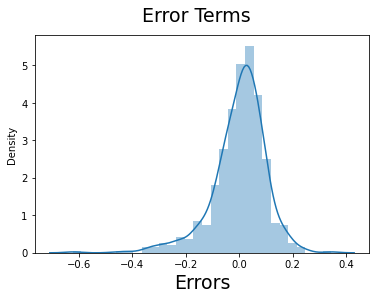

In [147]:
Res = y_train-y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Res), bins = 30)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19) 

In [148]:
#For MODEL 20
y_train_cnt2 = lm_20.predict(X_train_lm20)

Text(0.5, 0, 'Errors')

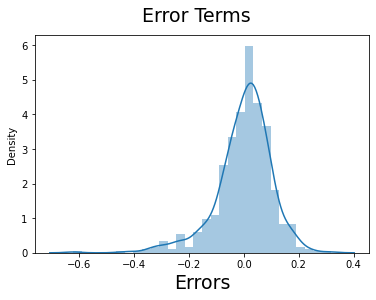

In [149]:
Res2 = y_train-y_train_cnt2

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Res2), bins = 30)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19) 

Text(0.5, 0, 'Errors')

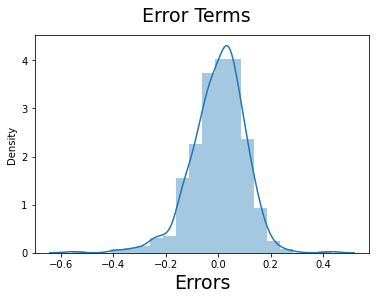

In [150]:
#For MODEL 21
y_train_cnt3 = lm_21.predict(X_train_lm21)
Res3 = y_train-y_train_cnt3

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Res3), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19) 

Text(0.5, 0, 'Errors')

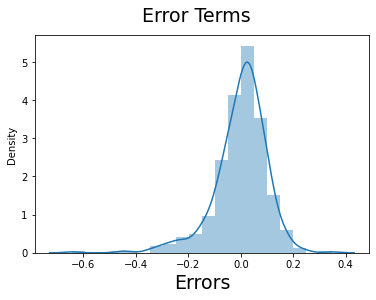

In [151]:
#For MODEL 22
y_train_cnt4 = lm_22.predict(X_train_lm22)
Res4 = y_train-y_train_cnt4

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Res4), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19) 

#####**All the Models have a normal distributed residuals where the mean is around zero and meets the assumption of the OLS.**

##**Predicting Using the final Model**

In [152]:
# Applying scaler() to numerical columns. Scaler.transform will be used to prevent data leakage.
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [153]:
#Checking the basic statistics of test data
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair_WX,weathersit_Manageable_WX
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,...,0.054795,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.650685,0.315068
std,0.498699,0.182488,0.499409,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,...,0.228362,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.478395,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
#Checking the Data types of columns in the test set
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   yr                        146 non-null    int64  
 1   holiday                   146 non-null    int64  
 2   workingday                146 non-null    int64  
 3   temp                      146 non-null    float64
 4   atemp                     146 non-null    float64
 5   hum                       146 non-null    float64
 6   windspeed                 146 non-null    float64
 7   cnt                       146 non-null    float64
 8   season_Spring             146 non-null    uint8  
 9   season_Summer             146 non-null    uint8  
 10  season_Winter             146 non-null    uint8  
 11  mnth_Aug                  146 non-null    uint8  
 12  mnth_Dec                  146 non-null    uint8  
 13  mnth_Feb                  146 non-null    uint8  
 14  mnth_Jan

##Model Evaluation on Model 6

In [155]:
#Dividing into X_test and y_test For Model 6

In [156]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [179]:
## Selecting the variables from Model 6.
col_6= X_train_fiveless.columns
X_test = X_test[col_6]

In [158]:
## Adding constant variable to test dataframe for Model 6.
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     146 non-null    float64
 1   yr                        146 non-null    int64  
 2   holiday                   146 non-null    int64  
 3   temp                      146 non-null    float64
 4   windspeed                 146 non-null    float64
 5   season_Spring             146 non-null    uint8  
 6   season_Summer             146 non-null    uint8  
 7   season_Winter             146 non-null    uint8  
 8   mnth_Jul                  146 non-null    uint8  
 9   mnth_Sep                  146 non-null    uint8  
 10  weathersit_Manageable_WX  146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 7.7 KB


In [159]:
# Making predictions using the model 6
y_pred6 = lm_6.predict(X_test_lm6)

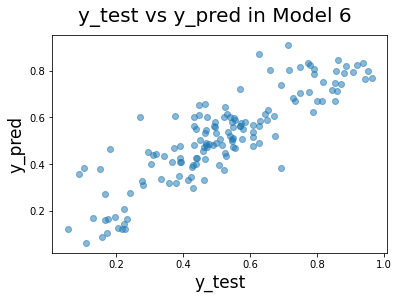

In [160]:
# Making a scatter plot with y_test and y_pred to visualise the spread
fig = plt.figure()
plt.scatter(y_test, y_pred6, alpha=.52)
fig.suptitle('y_test vs y_pred in Model 6', fontsize = 20)   # Heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17)                          # Y-label
plt.show()

######Model 6 looks good as it shows a Linear Pattern.

###R2 and Adjusted R2 Test On Model 6

In [161]:
# Importing r2_score from sklearn.metrics
from sklearn.metrics import r2_score

#Running r2
r2=r2_score(y_test, y_pred6)
r2

0.7462590225391785

In [162]:
# Finding Adjusted r2 of model 6 using the Formula 
n = X_test.shape[0]

# Number of Predictors is the shape along axis 1
p = X_test.shape[1]

# Using the Adjusted R-squared formula
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7274633945791177

#####R2 and Adjusted R2 on the test data using Model 6 is 0.746 and 0.72 respectively.

##Model Evaluation on Model 20

In [163]:

X_test = bike_test

In [164]:
# Selecting Variables that were in Model 20
col_20= X_train_twenty.columns
X_test = X_test[col_20]

In [165]:
# Adding Constant to the test set in Model 20
X_test_lm20 = sm.add_constant(X_test)
X_test_lm20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     146 non-null    float64
 1   yr                        146 non-null    int64  
 2   holiday                   146 non-null    int64  
 3   temp                      146 non-null    float64
 4   windspeed                 146 non-null    float64
 5   season_Summer             146 non-null    uint8  
 6   season_Winter             146 non-null    uint8  
 7   mnth_Jul                  146 non-null    uint8  
 8   mnth_Sep                  146 non-null    uint8  
 9   weathersit_Manageable_WX  146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 7.6 KB


In [166]:
## Making predictions using the Model 20
y_pred20 = lm_20.predict(X_test_lm20)

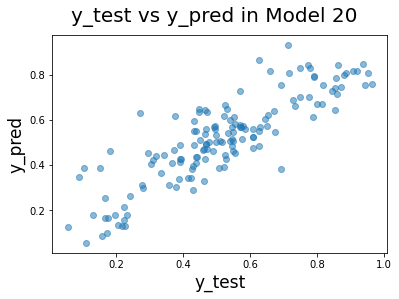

In [167]:
## Creating a scatterplot with y_test and y_pred to visualise the spread
fig = plt.figure()
plt.scatter(y_test, y_pred20, alpha=.52)
fig.suptitle('y_test vs y_pred in Model 20', fontsize = 20) # Plot heading 
plt.xlabel('y_test', fontsize = 17)                         # X-label
plt.ylabel('y_pred', fontsize = 17)                         # Y-label
plt.show()

######**Model 20 looks good as scatterplot is showing a strong linear relationship**.

##R2 and Adjusted R2 Test On Model 20

In [168]:
#Running r2
r2=r2_score(y_test, y_pred20)
r2

0.7321551063470433

In [169]:
# Finding out adjusted r2 using the formula
n = X_test.shape[0]

# Number of Predictors, which is the shape along axis 1
p = X_test.shape[1]

# Using the formula of Adjusted R-squared
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7144300766200093

######**The r2 and the adjusted r2 on the test data using Model 20 is 0.732 and 0.714 respectively.**

##Evaluation on Model 21

In [170]:
X_test = bike_test

#Selecting the variables that are part of Model 21
col_21= X_train_twentyone.columns
X_test = X_test[col_21]

#Adding a constant to the test set
X_test_lm21 = sm.add_constant(X_test)
X_test_lm21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     146 non-null    float64
 1   yr                        146 non-null    int64  
 2   holiday                   146 non-null    int64  
 3   windspeed                 146 non-null    float64
 4   season_Spring             146 non-null    uint8  
 5   season_Summer             146 non-null    uint8  
 6   mnth_Dec                  146 non-null    uint8  
 7   mnth_Jan                  146 non-null    uint8  
 8   mnth_Nov                  146 non-null    uint8  
 9   mnth_Sep                  146 non-null    uint8  
 10  weathersit_Fair_WX        146 non-null    uint8  
 11  weathersit_Manageable_WX  146 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 6.8 KB


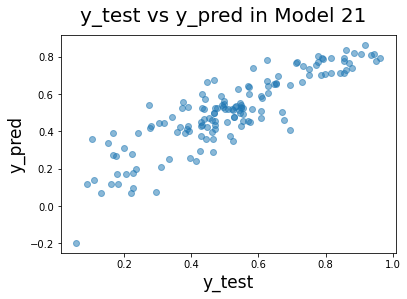

In [171]:
# Making prediction to Model 21
y_pred21 = lm_21.predict(X_test_lm21)

# Creating a scatterplot with y_test and y_pred to visualise the spread
fig = plt.figure()
plt.scatter(y_test, y_pred21, alpha=.52)
fig.suptitle('y_test vs y_pred in Model 21', fontsize = 20)  # heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17)                          # Y_Label
plt.show()

######Model 21 is also looking good as a linear relationship is showng above.

###Finding R2 and Adjusted r2 on Model 21

In [172]:
#Running r2
r2=r2_score(y_test, y_pred21)
r2

0.7588007781868973

In [173]:
#Finding adjusted r2 using the formula
n = X_test.shape[0]


# Number of predictors, Which is the shape along axis 1
p = X_test.shape[1]

# Using the formula to find Adjusted R-squared 

adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7390008420679113

######**The r2 and the adjusted r2 on test data using Model 21 is 0.759 and 0.739 respectively.**

##Evaluation on Model 22

In [174]:
X_test = bike_test

#Selecting the variables that are part of Model 22
col_22 = X_train_twentytwo.columns
X_test = X_test[col_22]

## Adding constant the test of Model 22
X_test_lm22 = sm.add_constant(X_test)
X_test_lm22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   const                     146 non-null    float64
 1   yr                        146 non-null    int64  
 2   holiday                   146 non-null    int64  
 3   temp                      146 non-null    float64
 4   windspeed                 146 non-null    float64
 5   season_Spring             146 non-null    uint8  
 6   season_Summer             146 non-null    uint8  
 7   season_Winter             146 non-null    uint8  
 8   mnth_Dec                  146 non-null    uint8  
 9   mnth_Jul                  146 non-null    uint8  
 10  mnth_Nov                  146 non-null    uint8  
 11  mnth_Sep                  146 non-null    uint8  
 12  weathersit_Manageable_WX  146 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 8.0 KB


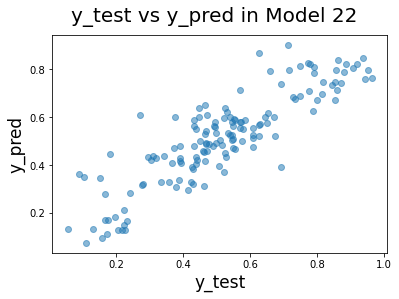

In [175]:
#Making predictions using Model 22
y_pred22 = lm_22.predict(X_test_lm22)

#Creating a scatterplot with y_test and y_pred to visualise the spread
fig = plt.figure()
plt.scatter(y_test, y_pred22, alpha=.52)
fig.suptitle('y_test vs y_pred in Model 22', fontsize = 20)  # heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17)                          # Y-label
plt.show()

######**Model 22 also looks good as it also shows a linear relationship in the scatterplot above.**

###R2 and Adjusted R2 Test on Model 22




In [176]:
# Running r2
r2=r2_score(y_test, y_pred22)
r2

0.7575889783126875

In [177]:
#Finding Adjusted r2

# n is number of rows in X
n = X_test.shape[0]


# Number of Predictors, which is the shape along axis 1
p = X_test.shape[1]

# Using the formula to find Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adj_r2

0.7357173071830052

#####**The r2 and the adjusted r2 using the Model 22 on test Data is 0.758 and 0.736 respectively.**

##Insights on the evaluations:


*   The findings are that Model 22 and Model 21 are at par with each other.
*   Model 6 performs the worse, followed by Model 20.
*   Since Model 21 (r2 = 0.759 and adj r2= 0.739) performs marginally better than Model 22 (r2 = 0.758 and adj r2= 0.736), although its almost not noticeable, our final model is Model 21.







##REPORT

##Final Model 21 equation:

**cnt = 0.2724 + (yr × 0.2424) + (holiday × -0.0836) +  (windspeed × -0.1824) + (season_Spring × -0.2527) + (season_Summer × -0.0381) + (mnth_Dec × -0.1229) +(mnth_Jan × -0.1190 ) + (mnth_Nov × -0.1253 ) + (mnth_Sep × 0.0533 ) +(weathersit_Fair_WX × 0.3175) + (weathersit_Manageable_WX × 0.2316)**

##List of Predictors


* yr : Year
* holiday 
* windspeed
* season_Spring
* season_Summer
* mnth_Dec : December
* mnth_Jan : January
* mnth_Nov : Novmember
* mnth_Sep : September
* weathersit_Fair_WX : Clear, Few clouds, Partly cloudy, Partly cloudy
* weathersit_Manageable_WX : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist




## Five Most Important Predictors are :



*   yr: When the year is 2019, the bike hired increases by 0.2424
*   season_Spring: When it is spring, the bike hired decreases by 0.2527
*   windspeed: An unit increase windspeed decreases the number of bikes being hired by 0.1824
*   Weathersit_Fair_WX: When the weather is fair, it increases the bike being hired by 0.3175
*   weathersit_Manageable_WX: When the weather is manageable, it increases the bikes being hired by 0.2316
 





##Other Noticeable Predictors are:



*   holiday: When it is a holiday, the bikes hired decline by 0.0836
*   season_Summer: When it is Summer, the bikes hired decline by 0.0381
*   mnth_Dec: When it is December, the bike hired decreases by 0.1229
*   mnth_Jan: If it is January, the bike hired decreases by 0.1190
*   mnth_Nov: If it is November, again, the bikes hired decreases by 0.1253 
*   mnth_Sep: However, if it is September, there will be an increase in the bikes being hired by 0.0533


######As one can see, the weather conditions and the time of the month plays a cricial Role. In case of Spring and Summers, Spring is still a cold season especially when the snow is melting, whereas in Summers, people tend to go out of town (and hence less demand for hired bikes) and/or it is too hot to ride a bike. As for Holidays, people might like to spend time with family indoors and do not have to go to work, and hence there is no need for bikes. Year 2019 is when the demand for bikes increased. This could be that hired bikes became more popular and/or people were motivated to exercise to keep fit and cycling became trendy.

######These are just hypothetically reasons of how these variables play a role.


######**Note: Although Temp (temperature in Celsius) and Hum (humidity) seems be important predictors in many of our perivous models. However, they are the major cause of multicollinearity with each other and other variables. Our final model has done away with both without affecting the r2 and the adjusted r2 as the other predictors are able to capture temp and hum in them. ** 

